<a href="https://colab.research.google.com/github/Extinctable/Linear-Regression-Model/blob/main/regression_colab_esp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
life = pd.read_csv("/content/drive/My Drive/Life Expectancy Data.csv")

In [11]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
# Lets code Satus into numerical values
life['Status'].replace(['Developing', 'Developed'], [0,1], inplace=True)

<ipython-input-12-a67c54c77134>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life['Status'].replace(['Developing', 'Developed'], [0,1], inplace=True)
<ipython-input-12-a67c54c77134>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  life['Status'].replace(['Developing', 'Developed'], [0,1], inplac

In [13]:
# Let's drop 'Country' and the rows with missing values
life.drop(['Country'], axis=1, inplace=True)
life = life.dropna()

In [14]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Status                           1649 non-null   int64  
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9    BMI                             1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure        

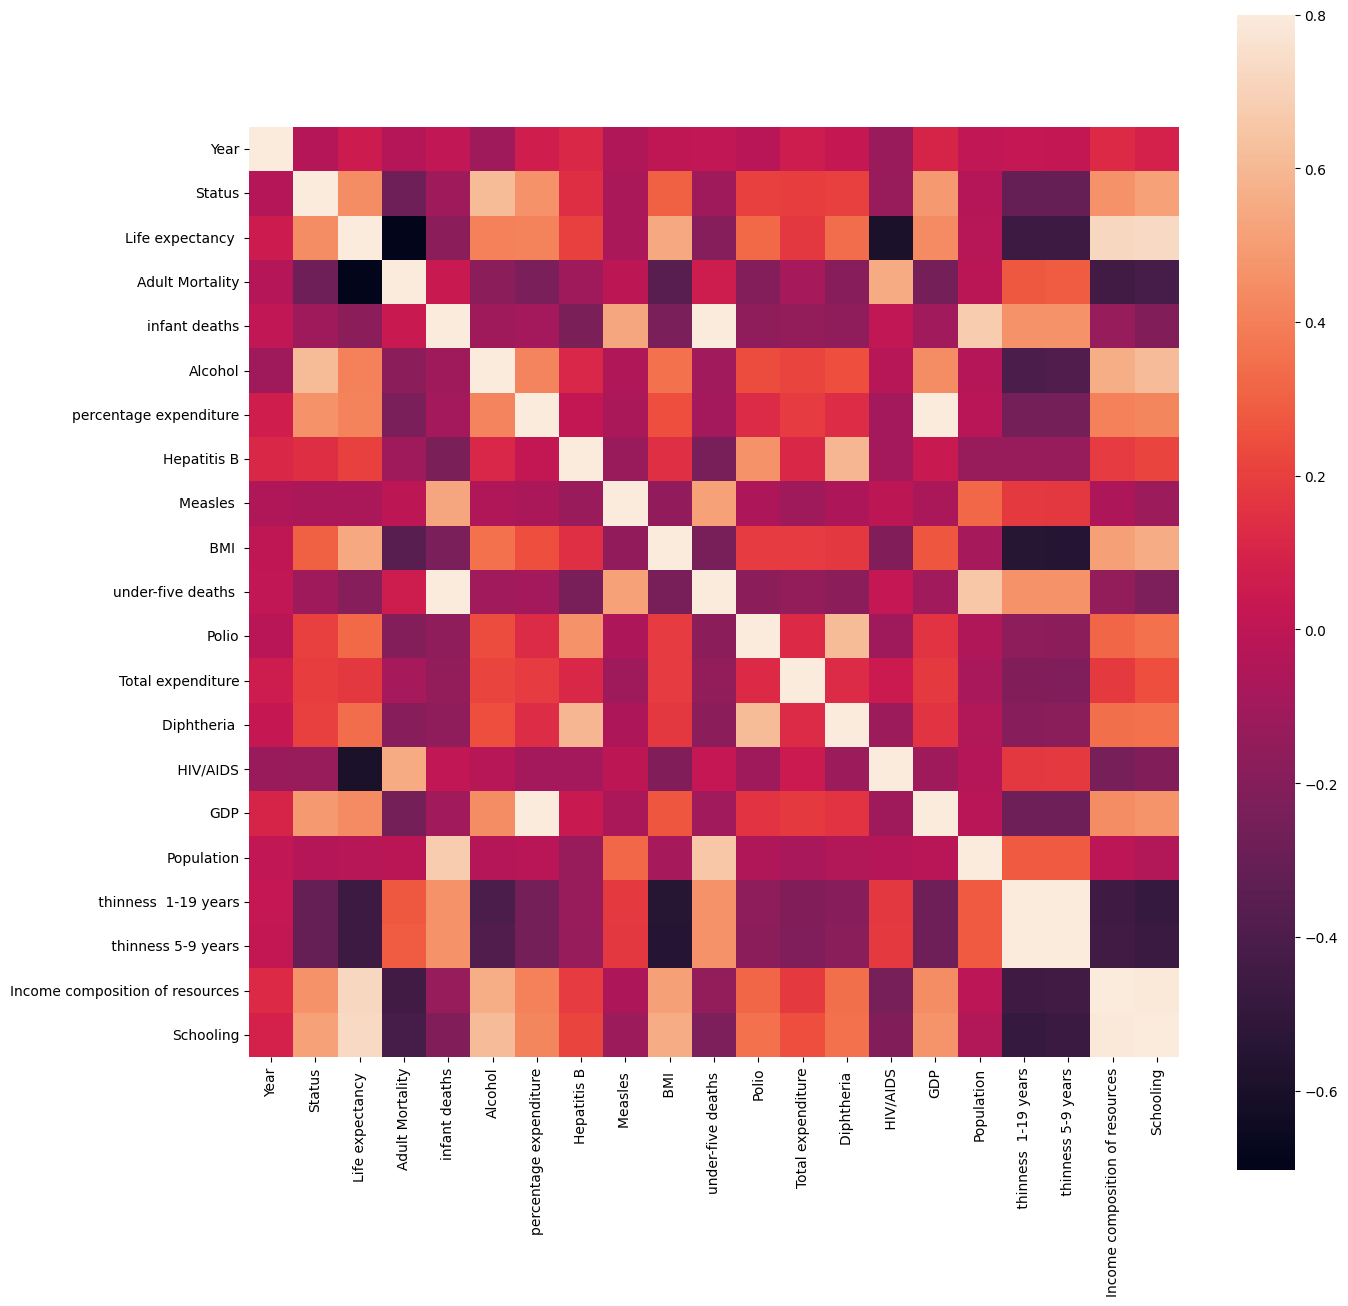

In [15]:
Corr_mat = life.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(Corr_mat, vmax = .8, square = True)
plt.show()

In [16]:
predictors = list(life.columns)
outcome = 'Life expectancy '

In [17]:
predictors.remove(outcome)

In [18]:
predictors

['Year',
 'Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [19]:
for i in range(len(predictors)):
    for j in range(len(predictors)):
        if i < j:
            corr, _ = pearsonr(life[predictors[i]], life[predictors[j]])
            print(f'The correlation between {predictors[i]} and {predictors[j]} is {corr}')

The correlation between Year and Status is -0.034138051904306556
The correlation between Year and Adult Mortality is -0.03709178245433219
The correlation between Year and infant deaths is 0.008029128421313472
The correlation between Year and Alcohol is -0.11336476394156993
The correlation between Year and percentage expenditure is 0.06955346828723971
The correlation between Year and Hepatitis B is 0.11489709227286936
The correlation between Year and Measles  is -0.053822045511541336
The correlation between Year and  BMI  is 0.005739060646850636
The correlation between Year and under-five deaths  is 0.010478594191314337
The correlation between Year and Polio is -0.01669880342051242
The correlation between Year and Total expenditure is 0.05949277661796506
The correlation between Year and Diphtheria  is 0.029640585705857585
The correlation between Year and  HIV/AIDS is -0.1234049904446325
The correlation between Year and GDP is 0.09642148485468173
The correlation between Year and Populati

Let's how linearly the predictors correlate with the price

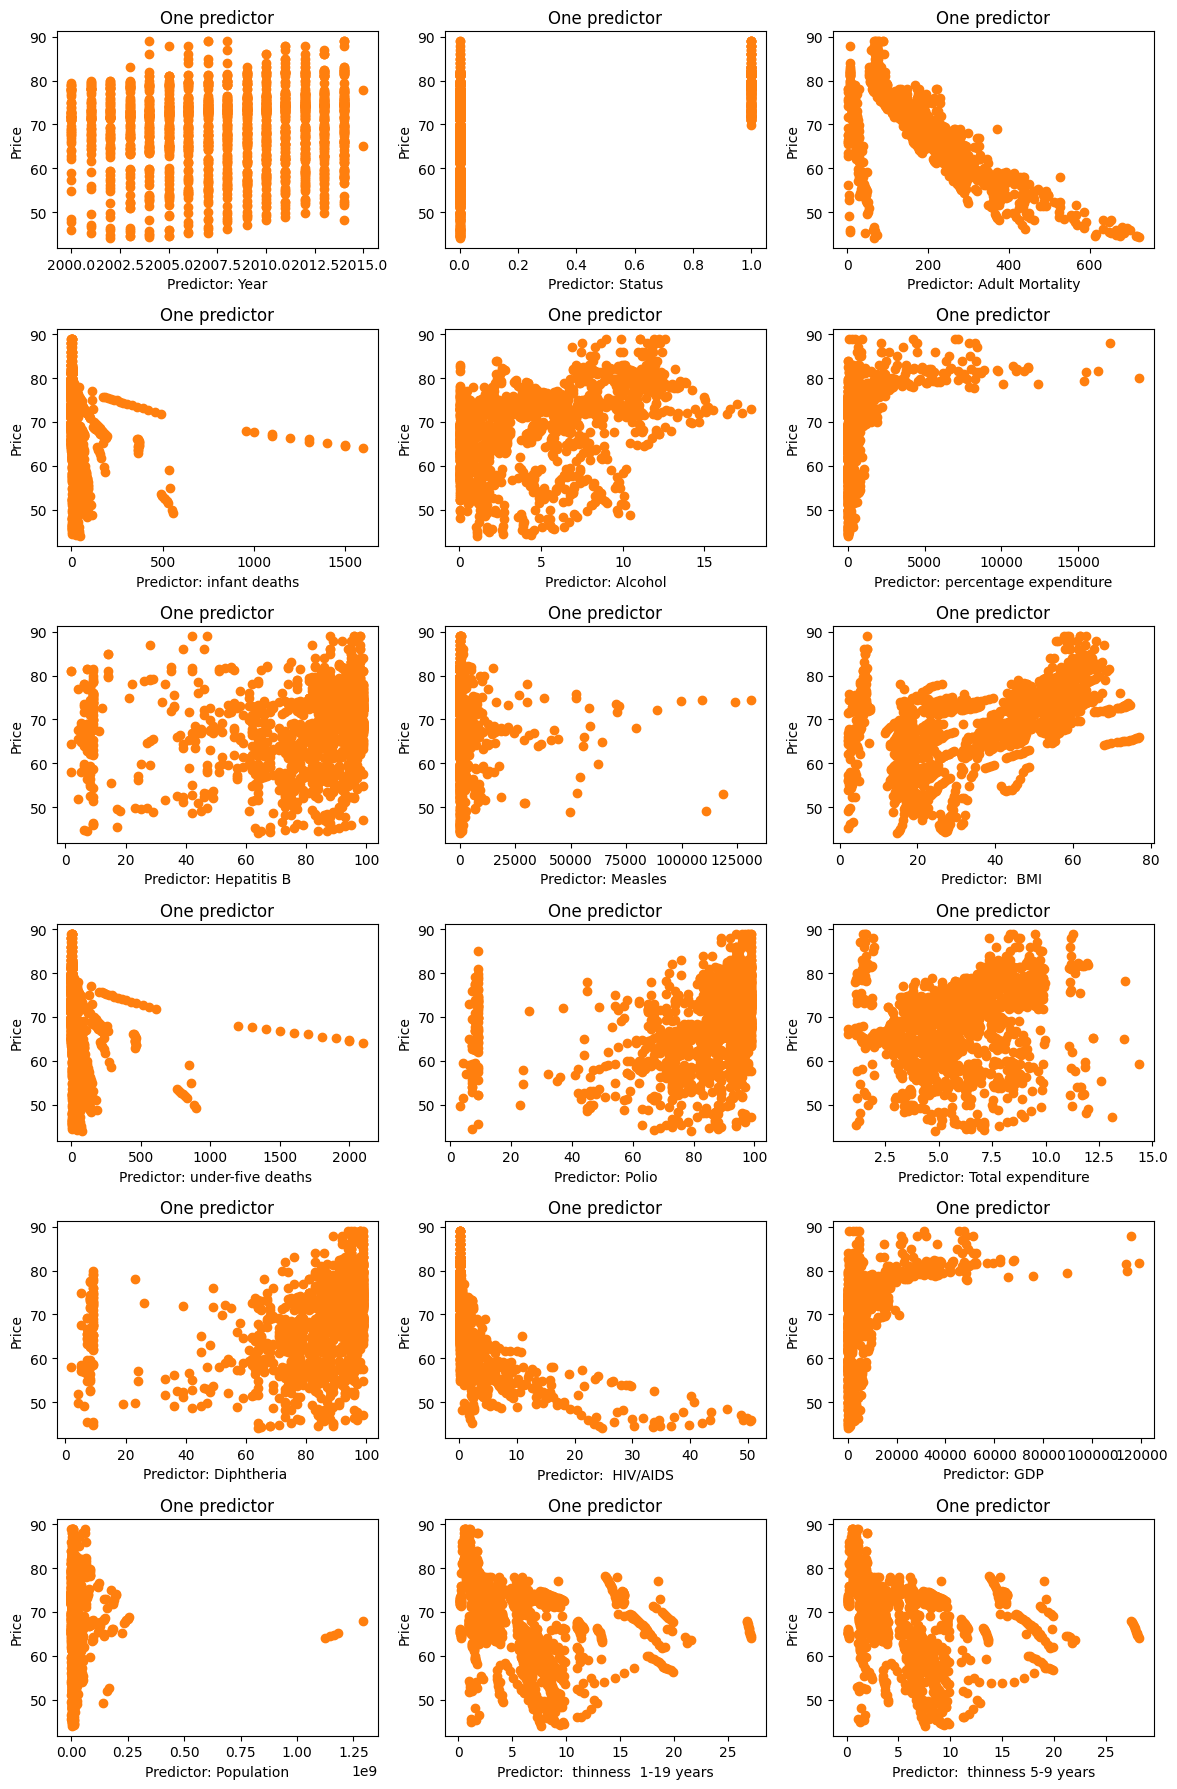

In [20]:
fig, ax = plt.subplots(6, 3, figsize=[12,18])

for i, axi in enumerate(ax.flat):
    axi.scatter(life[predictors[i]], life[outcome], color='tab:orange')
    axi.set_ylabel('Price')
    axi.set_xlabel(f'Predictor: {predictors[i]}')
    axi.set_title("One predictor");

plt.tight_layout()
plt.show()

In [21]:
model = sm.OLS(life[outcome], life[predictors].assign(const=1))
results = model.fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     422.9
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:47:40   Log-Likelihood:                -4421.2
No. Observations:                1649   AIC:                             8884.
Df Residuals:                    1628   BIC:                             8998.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                               -0.1272      0.023     -5.510      0.000      -0.172      -0.082
Status                              0.8865      0.335      2.644      0.008       0.229       1.544
Adult Mortality                    -0.0162      0.001    -17.171      0.000      -0.018      -0.014
infant deaths                       0.0887      0.011      8.376      0.000       0.068       0.110
Alcohol                            -0.1313      0.034     -3.901      0.000      -0.197      -0.065
percentage expenditure              0.0003      0.000      1.691      0.091   -4.83e-05       0.001
Hepatitis B                        -0.0033      0.004     -0.732      0.464      -0.012       0.005
Measles                         -1.033e-05   1.07e-05     -0.966      0.334   -3.13e-05    1.07e-05
 BMI                                0.0318      0.006      5.345      0.000       0.020       0.044
under-five deaths                  -0.0666      0.008     -8.682      0.000      -0.082      -0.052
Polio                               0.0058      0.005      1.132      0.258      -0.004       0.016
Total expenditure                   0.0922      0.040      2.281      0.023       0.013       0.171
Diphtheria                          0.0140      0.006      2.387      0.017       0.002       0.026
 HIV/AIDS                          -0.4481      0.018    -25.174      0.000      -0.483      -0.413
GDP                              2.451e-05   2.83e-05      0.867      0.386   -3.09e-05    7.99e-05
Population                      -6.085e-10   1.73e-09     -0.351      0.726   -4.01e-09    2.79e-09
 thinness  1-19 years              -0.0058      0.053     -0.111      0.912      -0.109       0.097
 thinness 5-9 years                -0.0501      0.052     -0.966      0.334      -0.152       0.052
Income composition of resources    10.4497      0.833     12.549      0.000       8.816      12.083
Schooling                           0.8949      0.059     15.142      0.000       0.779       1.011
const                             308.1207     46.223      6.666      0.000     217.457     398.784
==============================================================================
Omnibus:                       31.845   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.052
Skew:                          -0.107   Prob(JB):                     2.48e-13
Kurtosis:                       3.894   Cond. No.                     3.80e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+10. This might indicate that there are
strong multicollinearity or ot

Let's start backwards elimination. The least significant predictor is thinness -> removed.

In [23]:
# variable to remove
rem1 = ' thinness  1-19 years'
predictors.remove(rem1)

In [24]:
# variable to remove
rem2 = ' thinness 5-9 years'
predictors.remove(rem2)

In [25]:
# variable to remove
rem3 = 'Measles '
predictors.remove(rem3)

In [26]:
# variable to remove
rem4 = 'Year'
predictors.remove(rem4)

In [27]:
# variable to remove
rem5 = 'GDP'
predictors.remove(rem5)

In [28]:
# variable to remove
rem6 = 'Population'
predictors.remove(rem6)

In [29]:
# variable to remove
rem7 = ' BMI '
predictors.remove(rem7)

In [30]:
# variable to remove
rem8 = 'Hepatitis B'
predictors.remove(rem8)

In [31]:
# variable to remove
rem9 = 'Polio'
predictors.remove(rem9)

In [32]:
# variable to remove
rem10 = 'percentage expenditure'
predictors.remove(rem10)

In [33]:
# variable to remove
rem11 = 'infant deaths'
predictors.remove(rem11)

In [34]:
# variable to remove
rem12 = 'under-five deaths '
predictors.remove(rem12)

In [35]:
# variable to remove
rem13 = 'Diphtheria '
predictors.remove(rem13)

In [36]:
# variable to remove
rem14 = 'Adult Mortality'
predictors.remove(rem14)

In [37]:
model1 = sm.OLS(life[outcome], life[predictors].assign(const=1))
results1 = model1.fit()

In [38]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     923.4
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:47:40   Log-Likelihood:                -4708.1
No. Observations:                1649   AIC:                             9430.
Df Residuals:                    1642   BIC:                             9468.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Status                              2.1838      0.381      5.729      0.000       1.436       2.931
Alcohol                            -0.1898      0.037     -5.104      0.000      -0.263      -0.117
Total expenditure                   0.1612      0.047      3.430      0.001       0.069       0.253
 HIV/AIDS                          -0.6202      0.018    -34.183      0.000      -0.656      -0.585
Income composition of resources    14.5911      0.939     15.535      0.000      12.749      16.433
Schooling                           1.2511      0.065     19.241      0.000       1.124       1.379
const                              45.7352      0.579     79.052      0.000      44.600      46.870
==============================================================================
Omnibus:                       15.459   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.551
Skew:                          -0.032   Prob(JB):                     7.69e-06
Kurtosis:                       3.582   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# For comparison with NN methods, let's export the mean squared error of the residuals
mse = results1.mse_resid

In [40]:
# Roughly how much life expectancy is mispredicted on average
mse**0.5

4.213678555840869

In [41]:
# Here are the results of our final model
results1.params

,0
Status,2.183772
Alcohol,-0.189813
Total expenditure,0.161154
HIV/AIDS,-0.620225
Income composition of resources,14.591108
Schooling,1.251054
const,45.735238
